In [224]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import spikeinterface as si
import matplotlib.pyplot as plt
import os
from matplotlib.backends.backend_pdf import PdfPages

from tqdm import tqdm


In [225]:
cluster_inf = pd.read_csv("cluster_inf.tsv", sep='\t')
spike_inf = pd.read_csv("spike_inf.tsv", sep='\t')

In [226]:
cluster_inf = cluster_inf[cluster_inf['date'] != 12123]
spike_inf = spike_inf[spike_inf['date'] != 12123]

In [ ]:
date_order = ['021322', '022522', '031722', '042422', 
              '052422', '062422', '072322', '082322', 
              '092422', '102122', '112022', '122022', 
              #'012123', 
              '022223', '032123', '042323']

date_order_num = [int(i) for i in date_order]

In [ ]:

import colorsys

def generate_base_colors(n, saturation=0.6, lightness=0.5):
    hues = np.linspace(0, 1, n, endpoint=False)  
    base_colors = []
    for h in hues:
        rgb = colorsys.hls_to_rgb(h, lightness, saturation)
        base_colors.append(rgb)
    return base_colors

n_neurons = len(cluster_inf['Neuron'].unique())
base_palette = generate_base_colors(n_neurons) 


def get_gradient_palette(base_color, n_levels=16, reverse=False):
    palette = sns.light_palette(base_color, n_levels, reverse=reverse)
    return palette


with PdfPages('figure/cluster_view.pdf') as pdf:
    n_neurons = len(cluster_inf['Neuron'].unique())
    base_palette = generate_base_colors(n_neurons)
    
    for idx, neuron in enumerate(cluster_inf['Neuron'].unique()):
        temp = cluster_inf[cluster_inf['Neuron'] == neuron]
        
        current_base_color = base_palette[idx]
        line_palette = get_gradient_palette(current_base_color, n_levels=25, reverse=False)
        
        fig, ax = plt.subplots(figsize=(3, 3))
        for i in range(15):
            sns.lineplot(
                x=range(32),
                y=temp.iloc[i, 41:73],
                color=line_palette[i + 6],  
                ax=ax
            )
        
        ax.set_ylabel("Amplitude")
        ax.set_xticks([])
        ax.set_ylim(-12, 7)
        ax.set_title(neuron)
        pdf.savefig(fig)
        plt.close(fig)

In [ ]:
date_markers = {
    21322: 'o',
    82322: 's',
    122022: 'D',
    42323: '^'
}

unique_neurons = cluster_inf['Neuron'].unique()
palette = sns.color_palette('tab10', len(unique_neurons))
neuron_colors = {neuron: color for neuron, color in zip(unique_neurons, palette)}

with PdfPages('figure/probe_group_view.pdf') as pdf:
    temp = cluster_inf[cluster_inf['probe_group'] == 1]
    fig, ax = plt.subplots(figsize=(3, 5))
    for date, marker in date_markers.items():
        date_data = temp[temp['date'] == date]
        sns.scatterplot(
            x='position_1', y='position_2', hue='Neuron', style='date',
            markers={date: marker}, data=date_data, ax=ax, palette=neuron_colors, s=300
        )
    ax.set_title(f'Probe Group: {1}')
    ax.set_xlabel('Position 1')
    ax.set_ylabel('Position 2')
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(-10, 60)
    ax.set_ylim(-10, 110)
    ax.legend().remove()
    pdf.savefig(fig)
    plt.close(fig)

    temp = cluster_inf[cluster_inf['probe_group'] == 2]
    fig, ax = plt.subplots(figsize=(3, 5))
    for date, marker in date_markers.items():
        date_data = temp[temp['date'] == date]
        sns.scatterplot(
            x='position_1', y='position_2', hue='Neuron', style='date',
            markers={date: marker}, data=date_data, ax=ax, palette=neuron_colors, s=300
        )
    ax.set_title(f'Probe Group: {2}')
    ax.set_xlabel('Position 1')
    ax.set_ylabel('Position 2')
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(140, 210)
    ax.set_ylim(190, 310)
    ax.legend().remove()
    pdf.savefig(fig)
    plt.close(fig)

    temp = cluster_inf[cluster_inf['probe_group'] == 3]
    fig, ax = plt.subplots(figsize=(3, 5))
    for date, marker in date_markers.items():
        date_data = temp[temp['date'] == date]
        sns.scatterplot(
            x='position_1', y='position_2', hue='Neuron', style='date',
            markers={date: marker}, data=date_data, ax=ax, palette=neuron_colors, s=300
        )
    ax.set_title(f'Probe Group: {3}')
    ax.set_xlabel('Position 1')
    ax.set_ylabel('Position 2')
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(240, 360)
    ax.set_ylim(390, 510)
    ax.legend().remove()
    pdf.savefig(fig)
    plt.close(fig)

    temp = cluster_inf[cluster_inf['probe_group'] == 4]
    fig, ax = plt.subplots(figsize=(3, 5))
    for date, marker in date_markers.items():
        date_data = temp[temp['date'] == date]
        sns.scatterplot(
            x='position_1', y='position_2', hue='Neuron', style='date',
            markers={date: marker}, data=date_data, ax=ax, palette=neuron_colors, s=300
        )
    ax.set_title(f'Probe Group: {4}')
    ax.set_xlabel('Position 1')
    ax.set_ylabel('Position 2')
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(440, 510)
    ax.set_ylim(190, 310)
    ax.legend().remove()
    pdf.savefig(fig)
    plt.close(fig)

    temp = cluster_inf[cluster_inf['probe_group'] == 5]
    fig, ax = plt.subplots(figsize=(3, 5))
    for date, marker in date_markers.items():
        date_data = temp[temp['date'] == date]
        sns.scatterplot(
            x='position_1', y='position_2', hue='Neuron', style='date',
            markers={date: marker}, data=date_data, ax=ax, palette=neuron_colors, s=300
        )
    ax.set_title(f'Probe Group: {5}')
    ax.set_xlabel('Position 1')
    ax.set_ylabel('Position 2')
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(590, 660)
    ax.set_ylim(-10, 110)
    ax.legend().remove()
    pdf.savefig(fig)
    plt.close(fig)

In [279]:
displacement_df_position_1 = pd.DataFrame()
displacement_df_position_2 = pd.DataFrame()

for neuron in cluster_inf['Neuron'].unique():
            temp = cluster_inf[cluster_inf['Neuron'] == neuron]
            displacement_1 = []
            displacement_2 = []
            for date in date_order_num:
                displacement_1.append(temp[temp['date'] == date]['position_1'].values.mean() - temp[temp['date'] == 21322]['position_1'].values.mean())
                displacement_2.append(temp[temp['date'] == date]['position_2'].values.mean() - temp[temp['date'] == 21322]['position_2'].values.mean())
            displacement_df_position_1[neuron] = displacement_1
            displacement_df_position_2[neuron] = displacement_2
        

In [281]:
months_to_plot = [2, 6, 8, 12, 16]  
n_months = len(months_to_plot)

colors = sns.color_palette("viridis", n_colors=n_months)

with PdfPages('figure/displacement_kde.pdf') as pdf:
    for idx, m in enumerate(months_to_plot):
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.plot(0, 0, 'ko', markersize=8, zorder=10)  
        data_month = pd.concat((
            displacement_df_position_1.iloc[m-1, :], 
            displacement_df_position_2.iloc[m-1, :]), axis=1)
        
        sns.kdeplot(
            x = displacement_df_position_1.iloc[m-1, :],
            y=displacement_df_position_2.iloc[m-1, :],
            ax=ax,
            linewidth=1.5,
            fill=False,  
            label=f'Month {m}',
            thresh=0.25,
            levels=6,
            common_norm=False  
        )

        ax.set_xlabel('Position Value', fontsize=12)
        ax.set_ylabel('Density', fontsize=12)
        ax.set_ylim(-10, 10)
        ax.set_xlim(-10, 10)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=10)


        plt.tight_layout()
        pdf.savefig()
        plt.close()

In [332]:
date_groups = cluster_inf.groupby('date')
result_matrix = {}

for date, group in date_groups:
    neurons = group.set_index('Neuron')[['position_1', 'position_2']]
    neuron_list = sorted(neurons.index.unique())
    n = len(neuron_list)
    
    dist_matrix = np.zeros((n, n), dtype=float)
    
    for i in range(n):
        for j in range(n):
            if i == j:
                dist_matrix[i][j] = 0 
            else:
                pos_i = neurons.loc[neuron_list[i]]
                pos_j = neurons.loc[neuron_list[j]]
                dist = np.sqrt((pos_i['position_1'].mean()-pos_j['position_1'].mean())**2 + (pos_i['position_2'].mean()-pos_j['position_2'].mean())**2)
                dist_matrix[i][j] = dist
    
    result_matrix[date] = pd.DataFrame(dist_matrix, index=neuron_list)

In [362]:
from itertools import combinations

displacement_dict = {}
for probe in cluster_inf['probe_group']:
    temp = cluster_inf[cluster_inf['probe_group'] == probe]
    month_groups = temp.groupby('date')

    month_pairs = [(12123, 22522),
                (12123, 62422),
                (12123, 82322),
                (12123, 122022),
                (12123, 42323)]

    all_neurons = sorted(temp['Neuron'].unique())
    n_neurons = len(all_neurons)
    n_pairs = len(month_pairs)

    distance_matrix = np.full((n_pairs, n_neurons, n_neurons), np.nan)

    for pair_idx, (month_a, month_b) in enumerate(month_pairs):
        group_a = month_groups.get_group(month_a).set_index('Neuron')[['position_1', 'position_2']]
        group_b = month_groups.get_group(month_b).set_index('Neuron')[['position_1', 'position_2']]
        
        for i, neuron_i in enumerate(all_neurons):
            for j, neuron_j in enumerate(all_neurons):
                if (neuron_i in group_a.index) and (neuron_j in group_b.index):
                    pos_i = group_a.loc[neuron_i]
                    pos_j = group_b.loc[neuron_j]
                    distance = np.sqrt((pos_i['position_1'].mean()-pos_j['position_1'].mean())**2 + (pos_i['position_2'].mean()-pos_j['position_2'].mean())**2)
                    distance_matrix[pair_idx, i, j] = distance
    displacement_dict[probe] = distance_matrix

In [384]:

with PdfPages("figure/hist_displacement.pdf") as pdf:
    for month in range(5):
        fig, ax = plt.subplots(figsize=(4, 4))
        df_1 = []
        df_2 = []

        for probe in displacement_dict.keys():
            df_1.append([displacement_dict[probe][month, i, i] for i in range(displacement_dict[probe].shape[1])])
            df_2.append(displacement_dict[probe].flatten())

        df_1 = flattened_list = np.concatenate(df_1)
        df_2 = flattened_list = np.concatenate(df_2)
        sns.ecdfplot(df_1, color='#2980b9', label='Within-neuron displacement', linewidth=2, ax=ax)
        sns.ecdfplot(df_2, color='orange', label='Across-neuron displacement', linewidth=2, ax=ax)

        ax.spines['top'].set_visible(False) 
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.5)  
        ax.spines['bottom'].set_linewidth(1.5)
        pdf.savefig()
        plt.close()

In [5]:
trigger_time = pd.read_csv("/media/ubuntu/sda/data/mouse6/output/01_get_trigger/trigger_time.tsv", sep = '\t').iloc[:, 1:]

In [6]:
trigger_time = trigger_time[trigger_time['date'] != 12123]

In [7]:
from scipy.stats import  pearsonr
firing_rate_dict = {}
correlation_dict = {}

for date in spike_inf['date'].unique():
    spike_inf_temp = spike_inf[spike_inf['date'] == date]
    firing_rate_dict[date] = {}
    trigger_time_temp = trigger_time[trigger_time['date'] == int(date)]
    for image in trigger_time_temp['image'].unique():
        firing_rate_dict[date][image] = pd.DataFrame()
        trigger_time_temp_temp = trigger_time_temp[trigger_time_temp['image'] == image]
        for image_order in trigger_time_temp_temp['order'].sort_index().values.tolist():
            trigger_time_temp_temp_temp = trigger_time_temp_temp[trigger_time_temp_temp['order'] == image_order]
            temp = spike_inf_temp[(spike_inf_temp['time'] > int(trigger_time_temp_temp_temp['start'].values)) & (spike_inf_temp['time'] < int(trigger_time_temp_temp_temp['end'].values))]
            firing_rate_dict[date][image] = pd.concat((firing_rate_dict[date][image], pd.DataFrame(temp['Neuron'].value_counts()).sort_index()), axis=1)
        firing_rate_dict[date][image] = firing_rate_dict[date][image].fillna(0)

    correlation_dict[date] = {}
    for key in sorted(list(firing_rate_dict[date].keys())):
        num = firing_rate_dict[date][key].shape[1]
        correlation_dict[date][key] = np.zeros((num, num))
        for i in range(num):
            for j in range(num):
                correlation_dict[date][key][i, j], _ = pearsonr(firing_rate_dict[date][key].iloc[:, i].values.tolist(), firing_rate_dict[date][key].iloc[:, j].values.tolist())


In [8]:
outlier = []
for date in correlation_dict.keys():
    for image in range(1, 118):
        mean = (correlation_dict[date][image].sum(axis = 0)-1)/(len(correlation_dict[date][image]) - 1)
        for i in range(len(mean)):
            if mean[i] <= 0.6:
                outlier.append(f'{date}_{image}_{i}')

In [397]:
import pickle
with open('outlier.pkl', 'wb') as f:
    pickle.dump(outlier, f)

In [398]:
correlation_mean = pd.DataFrame()
for date in correlation_dict.keys():
    temp = []
    for image, df in correlation_dict[date].items():
        df = df.mean().mean()
        temp.append(df)
    correlation_mean = pd.concat((correlation_mean, pd.DataFrame(temp, columns=[date])),axis=1)

correlation_mean = correlation_mean[date_order_num]

In [401]:
with PdfPages("figure/similarity_within_dates.pdf") as pdf:
    mean = correlation_mean.mean(axis=0)
    std = correlation_mean.std(axis=0)

    plt.figure(figsize=(6, 3))
    sns.lineplot(x = range(15),
                 y = mean,
                 color = 'black')
    sns.scatterplot(x = range(15),
                    y = mean,
                    size=30,
                    color = "black",
                    legend=False)
    plt.fill_between(x  = range(15), 
                     y1=mean - std,
                     y2=mean + std,
                     color = 'grey',
                     alpha = 0.2)
    plt.xticks([])
    plt.ylim(0, 1)
    plt.yticks([])
    pdf.savefig()
    plt.close()

In [515]:
mean_similarity_dict = {}
for date in spike_inf['date'].unique():
    mean_similarity_dict[date] = {}
    for key in sorted(list(firing_rate_dict[date].keys())):
        mean_similarity = np.mean(correlation_dict[date][key])
        mean_similarity_dict[date][key] = mean_similarity

mean_similarity_df = pd.DataFrame(mean_similarity_dict).T

mean_similarity_df = mean_similarity_df.loc[date_order_num]
mean_similarity_df.index = date_order  

with PdfPages('figure/ER_similarity_lineplot.pdf') as pdf:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for key in mean_similarity_df.columns:
        ax.plot(mean_similarity_df.index, mean_similarity_df[key])
    
    sns.lineplot(x = range(15),
                 y = mean,
                 color = 'black', linewidth = 4)
    sns.scatterplot(x = range(15),
                    y = mean,
                    size=500,
                    color = "black",
                    legend=False)
    plt.fill_between(x  = range(15), 
                     y1=mean - std,
                     y2=mean + std,
                     color = 'grey',
                     alpha = 0.5)
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Mean Similarity')
    ax.set_title('Mean Similarity Over Time for Each Image')
    ax.set_ylim(0, 1)    
    pdf.savefig(fig)
    plt.close(fig)

In [403]:
with PdfPages("figure/raster_overall.pdf") as pdf:
    for neuron in spike_inf['Neuron'].unique():
        neuron_df = spike_inf[spike_inf['Neuron'] == neuron]

        fig, ax = plt.subplots(figsize = (12, 7.5))

        for index, row in trigger_time.iterrows():
            date = row['date']
            image_order = row['order']
            start = row['start'] - 5000
            end = row['end'] + 10000
            
            filtered_spikes = neuron_df[(neuron_df['date'] == date) & 
                                        (neuron_df['time'] >= start) & 
                                        (neuron_df['time'] <= end)]
            
            if not filtered_spikes.empty:
                ax.plot(filtered_spikes['time'] - start, [index] * len(filtered_spikes), marker='|', mew=1, markersize=3, ls='', color='k')

        ax.set_yticks([])
        #ax.axvspan(1 + (5000 - 1) * 0.5, 1 + (5000 - 1), color='gray', alpha=0.3)

        ax.set_xlabel('time (s)')
        ax.set_ylabel("")
        ax.set_title(f'Raster Plot for {neuron}')

        pdf.savefig(fig)
        plt.close()

In [404]:

with PdfPages("figure/peth_lineplot_all.pdf") as pdf:
    for neuron in spike_inf['Neuron'].unique():
        print(neuron)
        plt.figure(figsize=(4, 2.5))
        spike_rates_all = np.empty((99))

        for image in range(1, 19):
            neuron_df = spike_inf[spike_inf['Neuron'] == neuron]

            dates = trigger_time[trigger_time['image'] == image]['date'].unique()
            date_indices = np.arange(len(dates))  

            spike_rates = []
            std_rates = []

            for date in dates:
                trigger_time_temp = trigger_time[(trigger_time['image'] == image) & (trigger_time['date'] == date)]
                all_spikes = []

                for index, row in trigger_time_temp.iterrows():
                    start = row['start'] - 5000 
                    end = row['end'] + 10000

                    filtered_spikes = neuron_df[(neuron_df['date'] == date) &
                                                (neuron_df['time'] >= start) &
                                                (neuron_df['time'] <= end)]

                    if not filtered_spikes.empty:
                        relative_spikes = filtered_spikes['time'] - start
                        all_spikes.extend(relative_spikes)

                if all_spikes:
                    time_bins = np.linspace(0, max(all_spikes), 100)
                    spike_counts, _ = np.histogram(all_spikes, bins=time_bins)
                    spike_rate = spike_counts / (time_bins[1] - time_bins[0])
                    spike_rates.append(spike_rate)
                spike_rates_all = np.vstack((spike_rates_all, spike_rates))

        mean_spike_rate = np.mean(spike_rates, axis=0)
        std_spike_rate = np.std(spike_rates, axis=0)

        plt.plot(time_bins[:-1], mean_spike_rate, color='k', linewidth = 2)
        plt.plot(time_bins[:-1], mean_spike_rate - std_spike_rate, color='lightgray', alpha=0.7, linewidth = 1)
        plt.plot(time_bins[:-1], mean_spike_rate + std_spike_rate, color='lightgray', alpha=0.7, linewidth = 1)
        plt.title(neuron)
        plt.xticks([])
        plt.yticks([])
        pdf.savefig()
        plt.close()

Neuron_19
Neuron_12
Neuron_2
Neuron_16
Neuron_8
Neuron_1
Neuron_20
Neuron_15
Neuron_5
Neuron_17
Neuron_3
Neuron_13
Neuron_6
Neuron_10
Neuron_7
Neuron_18
Neuron_11
Neuron_4
Neuron_9


In [405]:
mean_spike_rate_dict = {}

with PdfPages("figure/peth_lineplot.pdf") as pdf:
    for image in range(1, 118):
        fig, axes = plt.subplots(4, 6, figsize=(30, 16))
        axes = axes.flatten()
        num = 0
        image_mean_spike_rate_data = []
        for neuron in spike_inf['Neuron'].unique():
            ax = axes[num]
            neuron_df = spike_inf[spike_inf['Neuron'] == neuron]

            dates = trigger_time[trigger_time['image'] == image]['date'].unique()
            date_indices = np.arange(len(dates))  

            spike_rates = []
            std_rates = []

            for date in dates:
                trigger_time_temp = trigger_time[(trigger_time['image'] == image) & (trigger_time['date'] == date)]
                all_spikes = []

                for index, row in trigger_time_temp.iterrows():
                    start = row['start'] - 5000
                    end = row['end'] + 10000

                    filtered_spikes = neuron_df[(neuron_df['date'] == date) &
                                                (neuron_df['time'] >= start) &
                                                (neuron_df['time'] <= end)]

                    if not filtered_spikes.empty:
                        relative_spikes = filtered_spikes['time'] - start
                        all_spikes.extend(relative_spikes)

                if all_spikes:
                    time_bins = np.linspace(0, max(all_spikes), 100)
                    spike_counts, _ = np.histogram(all_spikes, bins=time_bins)
                    spike_rate = spike_counts / (time_bins[1] - time_bins[0])
                    spike_rates.append(spike_rate)

            mean_spike_rate = np.mean(spike_rates, axis=0)
            std_spike_rate = np.std(spike_rates, axis=0)

            image_mean_spike_rate_data.append({
                'Neuron': neuron,
                'Mean_Spike_Rate': mean_spike_rate
            })

            ax.plot(time_bins[:-1], mean_spike_rate, color='k', linewidth = 2)
            ax.plot(time_bins[:-1], mean_spike_rate - std_spike_rate, color='lightgray', alpha=0.7, linewidth = 1)
            ax.plot(time_bins[:-1], mean_spike_rate + std_spike_rate, color='lightgray', alpha=0.7, linewidth = 1)
            #ax.set_ylim(- np.mean(mean_spike_rate) , 2 *np.mean(mean_spike_rate))
            #ax.fill_between(time_bins[:-1], mean_spike_rate - std_spike_rate, mean_spike_rate + std_spike_rate, color='lightgray', alpha=0.5, label='Std Deviation')
            quarter = (time_bins[-1] - time_bins[0]) * 0.25 + time_bins[0]
            three_quarter = (time_bins[-1] - time_bins[0]) * 0.75 + time_bins[0]
            ax.annotate("", xy=(quarter, np.max(mean_spike_rate + std_spike_rate) * 0.9), xytext=(quarter, np.max(mean_spike_rate + std_spike_rate)),
                        arrowprops=dict(arrowstyle="-|>", color="black"))
            ax.annotate("", xy=(three_quarter, np.max(mean_spike_rate + std_spike_rate) * 0.9), xytext=(three_quarter, np.max(mean_spike_rate + std_spike_rate)),
                        arrowprops=dict(arrowstyle="-|>", color="black"))
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(f'{neuron}', fontsize=10)
            ax.legend()

            ax.set_xticks([])
            ax.set_yticks([])
            ax.grid(False)
            ax.legend().set_visible(False)
            num += 1
        axes[19].axis('off')
        axes[18].axis('off')
        fig.suptitle(f"Image_{image}", fontsize=20)
        fig.text(0.5, 0.04, 'Time', ha='center', fontsize=14)
        fig.text(0.06, 0.5, 'Spike Rate (Hz)', va='center', rotation='vertical', fontsize=14)
        pdf.savefig(fig)
        plt.close()

        mean_spike_rate_dict[image] = pd.DataFrame(image_mean_spike_rate_data)

In [528]:
image_mean_spike_rate_data = {}

total_duration = 20000  
n_bins = 28
time_bins = np.linspace(0, total_duration, n_bins + 1)

for image in range(1, 118):
    image_dict = {}
    dates = trigger_time[trigger_time['image'] == image]['date'].unique()
    
    for date in dates:
        neuron_data = []
        
        for neuron in spike_inf['Neuron'].unique():
            neuron_df = spike_inf[spike_inf['Neuron'] == neuron]
            trigger_time_temp = trigger_time[(trigger_time['image'] == image) 
                                            & (trigger_time['date'] == date)]
            
            trial_rates = [] 
            
            for _, row in trigger_time_temp.iterrows():
                start = row['start'] - 5000
                end = row['end'] + 10000
                
                filtered_spikes = neuron_df[(neuron_df['date'] == date) 
                                          & (neuron_df['time'] >= start)
                                          & (neuron_df['time'] <= end)]
                
                relative_spikes = filtered_spikes['time'] - start
                
                spike_counts, _ = np.histogram(relative_spikes, bins=time_bins)
                trial_rate = spike_counts
                trial_rates.append(trial_rate)
            
            if trial_rates:
                mean_rate = np.mean(trial_rates, axis=0)
            else:
                mean_rate = np.zeros(n_bins)
            
            neuron_data.append(mean_rate)
        
        df = pd.DataFrame(
            data=neuron_data,
            index=spike_inf['Neuron'].unique(),
            columns=time_bins[:-1]  
        )
        image_dict[date] = df
    
    image_mean_spike_rate_data[image] = image_dict

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def create_fill_polygons(x, z, y_pos, color, alpha = 0.6):
    verts = []
    for i in range(len(x)-1):
        verts.append([
            (x[i], y_pos-0.3, 0),    
            (x[i], y_pos-0.3, z[i]), 
            (x[i+1], y_pos-0.3, z[i+1]), # 右上
            (x[i+1], y_pos-0.3, 0),  # 右下
            (x[i], y_pos-0.3, 0)     # 闭合
        ])
    return Poly3DCollection(verts, alpha=alpha, facecolors=color, edgecolors='none')

def plot_neuron_3d_fill(ax, time_bins, values, y_pos):
    n_bins = len(time_bins)
    q1 = n_bins//4 
    q3 = 3*n_bins//4 
    
    x_deep = time_bins[q1:q3]
    z_deep = values[q1:q3]
    deep_poly = create_fill_polygons(x_deep, z_deep, y_pos, '#3295D3', alpha=0.8)
    ax.add_collection3d(deep_poly)
    
    if q1 > 0:
        x_light1 = time_bins[:q1 + 1]
        z_light1 = values[:q1 + 1]
        light_poly1 = create_fill_polygons(x_light1, z_light1, y_pos, '#87CEFA')
        ax.add_collection3d(light_poly1)
    
    if q3 < n_bins:
        x_light2 = time_bins[q3 -1:]
        z_light2 = values[q3 -1:]
        light_poly2 = create_fill_polygons(x_light2, z_light2, y_pos, '#87CEFA')
        ax.add_collection3d(light_poly2)
    
    ax.plot(time_bins, [y_pos - 0.3]*len(time_bins), values, 
           color='black', lw=1.8, alpha=0.95)

def generate_filled_pdf(image_data, target_dates, filename):
    with PdfPages(f'figure/{filename}') as pdf:
        for img_num, img_data in image_data.items():
            sample_date = next(iter(img_data.keys()))
            neurons = img_data[sample_date].index.tolist()
            
            n_neurons = len(neurons)
            n_cols = int(np.ceil(n_neurons**0.5))
            n_rows = int(np.ceil(n_neurons/n_cols))
            
            fig = plt.figure(figsize=(n_cols*5, n_rows*3.5))
            fig.suptitle(f'Image {img_num}', y=0.95, fontsize=12)
            
            for idx, neuron in enumerate(neurons):
                ax = fig.add_subplot(n_rows, n_cols, idx+1, projection='3d')
                
                for y_pos, date in enumerate(target_dates):
                    try:
                        df = img_data[date]
                        time_bins = df.columns.values
                        values = df.loc[neuron].values
                        
                        plot_neuron_3d_fill(ax, time_bins, values, y_pos)
                    
                    
                    except KeyError:
                        continue
                
                ax.set_xlim(time_bins.min(), time_bins.max())
                ax.set_zlim(0, np.nanmax(values)*1.2)
                ax.yaxis.set_ticklabels([]) 
                ax.xaxis.set_ticklabels([])
                ax.grid(False)
                ax.set_box_aspect((1, 2.1, 0.9))
                ax.view_init(elev=35, azim=-60)
                ax.set_title(f'{neuron}', fontsize=9, pad=8)
                ax.set_facecolor('white')        
                ax.xaxis.pane.fill = False   
                ax.yaxis.pane.fill = False
                ax.zaxis.pane.fill = False   
                ax.zaxis.line.set_lw(0)  
                ax.set_zticks([]) 
            
            plt.title(f'Image_{img_num}')
            plt.tight_layout()
            pdf.savefig(fig, bbox_inches='tight')
            plt.close()

generate_filled_pdf(image_mean_spike_rate_data, [21322, 22522, 31722, 42422, 52422, 62422, 72322, 82322], "neural_response_3d_month1_8.pdf")
generate_filled_pdf(image_mean_spike_rate_data, [21322, 22522, 42422, 62422, 82322, 102122, 122022, 42323], "neural_response_3d_month1_16.pdf")

In [9]:
for i in outlier:
    date = i.split("_")[0]
    image = i.split("_")[1] + "_" + i.split("_")[2]
    trigger_time = trigger_time[~((trigger_time['date'] == int(date)) & (trigger_time['order'] == image))]

In [487]:
trigger_time.to_csv("trigger_time.csv", index=False)

In [488]:
spike_rates_all = pd.DataFrame()

for image in range(1, 50):
    for neuron in cluster_inf['Neuron'].unique():
        neuron_df = spike_inf[spike_inf['Neuron'] == neuron]

        dates = trigger_time[trigger_time['image'] == image]['date'].unique()
        date_indices = np.arange(len(dates))  

        spike_rates = []
        std_rates = []

        for date in dates:
            trigger_time_temp = trigger_time[(trigger_time['image'] == image) & (trigger_time['date'] == date)]
            all_spikes = []

            for index, row in trigger_time_temp.iterrows():
                start = row['start'] - 5000
                end = row['end'] + 10000

                filtered_spikes = neuron_df[(neuron_df['date'] == date) &
                                            (neuron_df['time'] >= start) &
                                            (neuron_df['time'] <= end)]

                if not filtered_spikes.empty:
                    relative_spikes = filtered_spikes['time'] - start
                    all_spikes.extend(relative_spikes)

            if all_spikes:
                time_bins = np.linspace(0, max(all_spikes), 500)
                spike_counts, _ = np.histogram(all_spikes, bins=time_bins)
                spike_rate = spike_counts / (time_bins[1] - time_bins[0])
                spike_rates.append(spike_rate)

            spike_rates_all = pd.concat((spike_rates_all, pd.DataFrame(spike_rates)), axis= 0)

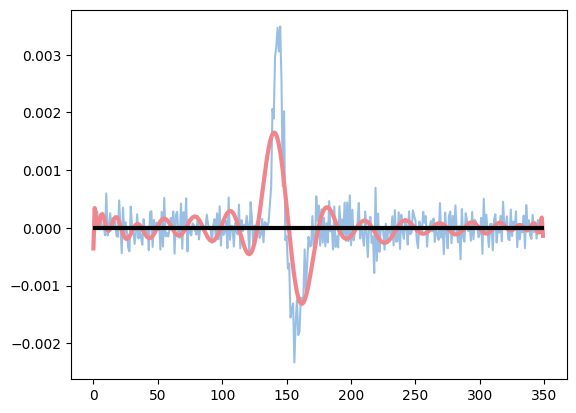

In [489]:
spike_rates_diff = np.diff(spike_rates_all, axis=1)
mean_diff = spike_rates_diff.mean(axis=0)
std_diff = spike_rates_diff.std(axis=0)

with PdfPages("figure/peth_diff.pdf") as pdf:
    from numpy.polynomial.polynomial import Polynomial
    p = Polynomial.fit(range(350), mean_diff[:350], deg=35) 

    plt.figure()
    plt.plot(range(350), mean_diff[:350], alpha=0.7, color = "#70A5D9")
    plt.plot(range(350), p(range(350)), color='#F0868C',linewidth = 3)
    plt.hlines(y = 0, xmin=0, xmax=350, colors= 'black', linewidth = 3)
    pdf.savefig()

In [490]:
roots = p.roots()[(p.roots() < 180) & (p.roots() > 115)]

In [495]:
roots = [127.29566984, 151.66297325, 174.72058788]

In [520]:
from scipy import stats

num_neurons = len(spike_inf['Neuron'].unique())
num_images = 117
result_matrix = np.zeros((num_neurons, num_images), dtype=int)
pvalue_matrix = np.ones((num_neurons, num_images))
diff_matrix = np.ones((num_neurons, num_images))

for image in range(1, 118):
    num = 0
    image_mean_spike_rate_data = []
    for neuron_idx, neuron in enumerate(spike_inf['Neuron'].unique()):

        neuron_df = spike_inf[spike_inf['Neuron'] == neuron]

        dates = trigger_time[trigger_time['image'] == image]['date'].unique()
        date_indices = np.arange(len(dates))  

        spike_rates_first = []
        spike_rates_second = []

        for date in dates:
            trigger_time_temp = trigger_time[(trigger_time['image'] == image) & (trigger_time['date'] == date)]
            all_spikes_first = []
            all_spikes_second = []

            for index, row in trigger_time_temp.iterrows():
                start = row['start'] + roots[0]/499 * 20000 - 5000
                end = row['start'] + roots[2]/499 * 20000 - 5000

                filtered_spikes_first = neuron_df[(neuron_df['date'] == date) &
                                                  (neuron_df['time'] >= start) &
                                                  (neuron_df['time'] <= end)]

                if not filtered_spikes_first.empty:
                    relative_spikes_first = filtered_spikes_first['time'] - start
                    all_spikes_first.extend(relative_spikes_first)

                start_2 = row['start'] -(end - start)
                end_2 = row['start'] 

                filtered_spikes_second = neuron_df[(neuron_df['date'] == date) &
                                                   (neuron_df['time'] >= start_2) &
                                                   (neuron_df['time'] <= end_2)]

                if not filtered_spikes_second.empty:
                    relative_spikes_second = filtered_spikes_second['time'] - start_2
                    all_spikes_second.extend(relative_spikes_second)

            if all_spikes_first:
                time_bins_first = np.linspace(0, max(all_spikes_first), 100)
                spike_counts_first, _ = np.histogram(all_spikes_first, bins=time_bins_first)
                spike_rate_first = spike_counts_first / (time_bins_first[1] - time_bins_first[0])
                spike_rates_first.append(spike_rate_first)

            if all_spikes_second:
                time_bins_second = np.linspace(0, max(all_spikes_second), 100)
                spike_counts_second, _ = np.histogram(all_spikes_second, bins=time_bins_second)
                spike_rate_second = spike_counts_second / (time_bins_second[1] - time_bins_second[0])
                spike_rates_second.append(spike_rate_second)

        mean_spike_rate_first = np.mean(spike_rates_first, axis=0) if spike_rates_first else np.zeros(100)
        mean_spike_rate_second = np.mean(spike_rates_second, axis=0) if spike_rates_second else np.zeros(100)

        t_stat, p_value = stats.ttest_ind(mean_spike_rate_first, mean_spike_rate_second, nan_policy='omit')

        if p_value < 0.01:
            if np.mean(mean_spike_rate_first) > np.mean(mean_spike_rate_second):
                result_matrix[neuron_idx, image-1] = 1
                diff_matrix[neuron_idx, image-1] = np.mean(mean_spike_rate_first)/np.mean(mean_spike_rate_second)
            else:
                result_matrix[neuron_idx, image-1] = -1
                diff_matrix[neuron_idx, image-1] = np.mean(mean_spike_rate_second)/np.mean(mean_spike_rate_first)
        else:
            result_matrix[neuron_idx, image-1] = 0
            diff_matrix[neuron_idx, image-1] = 1
        pvalue_matrix[neuron_idx, image-1] = p_value
        


neurons = spike_inf['Neuron'].unique()
images = range(1, 118)
result_df = pd.DataFrame(result_matrix, index=neurons, columns=images)
pvalue_df = pd.DataFrame(pvalue_matrix, index=neurons, columns=images)
diff_df = pd.DataFrame(diff_matrix, index=neurons, columns=images)

result_df.to_csv("glimpse_result_df.csv")
pvalue_df.to_csv("glimpse_pvalue_df.csv")
diff_df.to_csv("glimpse_diff_df.csv")

In [521]:
from matplotlib.colors import ListedColormap

with PdfPages("figure/glimpse_neuron_reaction.pdf") as pdf:
    cmap = ListedColormap(['#70A5D9', 'lightgrey', '#F0868C'])
    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(result_df, cmap=cmap, cbar=True)
    pdf.savefig()
    plt.close()

    cmap = ListedColormap(['#70A5D9', 'lightgrey', '#F0868C'])
    plt.figure(figsize=(4, 9))
    ax = sns.heatmap(result_df.T, cmap=cmap, cbar=False, linecolor="white",   
    linewidths=0.3)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.axis('off') 
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(-np.log(pvalue_df), cmap='coolwarm', cbar=True, annot=True,fmt='.2f',
    annot_kws={"size": 4})
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.axis('off') 
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(-np.log(pvalue_df), cmap='coolwarm', cbar=False, annot=False,fmt='.2f',
    annot_kws={"size": 4}, vmax=25)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.axis('off') 
    pdf.savefig()
    plt.close()

In [522]:
from scipy import stats

num_neurons = len(spike_inf['Neuron'].unique())
num_images = 117
result_matrix = np.zeros((num_neurons, num_images), dtype=int)
pvalue_matrix = np.ones((num_neurons, num_images))
diff_matrix = np.ones((num_neurons, num_images))

for image in range(1, 118):
    num = 0
    image_mean_spike_rate_data = []
    for neuron_idx, neuron in enumerate(spike_inf['Neuron'].unique()):

        neuron_df = spike_inf[spike_inf['Neuron'] == neuron]

        dates = trigger_time[trigger_time['image'] == image]['date'].unique()
        date_indices = np.arange(len(dates))  

        spike_rates_first = []
        spike_rates_second = []

        for date in dates:
            trigger_time_temp = trigger_time[(trigger_time['image'] == image) & (trigger_time['date'] == date)]
            all_spikes_first = []
            all_spikes_second = []

            for index, row in trigger_time_temp.iterrows():
                start = row['start'] + roots[2]/499 * 20000 - 5000
                end = row['end'] + 5000

                filtered_spikes_first = neuron_df[(neuron_df['date'] == date) &
                                                  (neuron_df['time'] >= start) &
                                                  (neuron_df['time'] <= end)]

                if not filtered_spikes_first.empty:
                    relative_spikes_first = filtered_spikes_first['time'] - start
                    all_spikes_first.extend(relative_spikes_first)

                start_2 = row['start'] - (end - start)
                end_2 = row['start'] 

                filtered_spikes_second = neuron_df[(neuron_df['date'] == date) &
                                                   (neuron_df['time'] >= start_2) &
                                                   (neuron_df['time'] <= end_2)]

                if not filtered_spikes_second.empty:
                    relative_spikes_second = filtered_spikes_second['time'] - start_2
                    all_spikes_second.extend(relative_spikes_second)

            if all_spikes_first:
                time_bins_first = np.linspace(0, max(all_spikes_first), 500)
                spike_counts_first, _ = np.histogram(all_spikes_first, bins=time_bins_first)
                spike_rate_first = spike_counts_first / (time_bins_first[1] - time_bins_first[0])
                spike_rates_first.append(spike_rate_first)

            if all_spikes_second:
                time_bins_second = np.linspace(0, max(all_spikes_second), 500)
                spike_counts_second, _ = np.histogram(all_spikes_second, bins=time_bins_second)
                spike_rate_second = spike_counts_second / (time_bins_second[1] - time_bins_second[0])
                spike_rates_second.append(spike_rate_second)

        mean_spike_rate_first = np.mean(spike_rates_first, axis=0) if spike_rates_first else np.zeros(100)
        mean_spike_rate_second = np.mean(spike_rates_second, axis=0) if spike_rates_second else np.zeros(100)

        t_stat, p_value = stats.ttest_ind(mean_spike_rate_first, mean_spike_rate_second, nan_policy='omit')

        if p_value < 1e-3:
            if np.mean(mean_spike_rate_first) > np.mean(mean_spike_rate_second):
                result_matrix[neuron_idx, image-1] = 1
            else:
                result_matrix[neuron_idx, image-1] = -1
        else:
            result_matrix[neuron_idx, image-1] = 0
        pvalue_matrix[neuron_idx, image-1] = p_value
        diff_matrix[neuron_idx, image-1] = np.mean(mean_spike_rate_first)/np.mean(mean_spike_rate_second)


neurons = spike_inf['Neuron'].unique()
images = range(1, 118)
result_df = pd.DataFrame(result_matrix, index=neurons, columns=images)
pvalue_df = pd.DataFrame(pvalue_matrix, index=neurons, columns=images)
diff_df = pd.DataFrame(diff_matrix, index=neurons, columns=images)

result_df.to_csv("last_result_df.csv")
pvalue_df.to_csv("last_pvalue_df.csv")
diff_df.to_csv("last_diff_df.csv")

In [ ]:
from matplotlib.colors import ListedColormap

with PdfPages("figure/last_neuron_reaction.pdf") as pdf:
    cmap = ListedColormap(['#70A5D9', 'lightgrey', '#F0868C'])
    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(result_df, cmap=cmap, cbar=True)
    pdf.savefig()
    plt.close()

    cmap = ListedColormap(['#70A5D9', 'lightgrey', '#F0868C'])
    plt.figure(figsize=(4, 9))
    ax = sns.heatmap(result_df.T, cmap=cmap, cbar=False, linecolor="white",   
    linewidths=0.3)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.axis('off') 
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(-np.log(pvalue_df), cmap='coolwarm', cbar=True, annot=True,fmt='.2f',
    annot_kws={"size": 4})
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.axis('off') 
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(-np.log(pvalue_df), cmap='coolwarm', cbar=False, annot=False,fmt='.2f',
    annot_kws={"size": 4}, vmax=25)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.axis('off') 
    pdf.savefig()
    plt.close()

In [245]:
import numpy as np
import pandas as pd
import quantities as pq
from neo import SpikeTrain
def generate_binned_spiketrains(trigger_time_df, spike_inf_df, target_image):
    """
    生成指定image下的分箱脉冲矩阵
    
    参数
    ----
    trigger_time_df : pd.DataFrame
        列包括：start, end, image, date, order
    spike_inf_df : pd.DataFrame
        列包括：time, neuron, date
    target_image : str/int
        目标图像标识
    
    返回
    ----
    binned_data : list of ndarray
        [
            # Trial 1 的矩阵 (neurons × 100 bins)
            array([[n0_bin1_count, n0_bin2_count, ...],
                   [n1_bin1_count, n1_bin2_count, ...],
                   ...]),
            # Trial 2
            ...
        ]
    """
    # =====================================
    # 步骤 1: 筛选目标试次并转换时间单位
    # =====================================
    mask = (trigger_time_df['image'] == target_image)
    target_triggers = trigger_time_df[mask].sort_values('order')
    
    # 转换时间单位 (0.1ms → 秒)
    target_triggers = target_triggers.copy()
    target_triggers['start'] = target_triggers['start'] * 0.1e-3
    target_triggers['end'] = target_triggers['end'] * 0.1e-3

    # =====================================
    # 步骤 2: 处理神经脉冲数据
    # =====================================
    target_spikes = spike_inf_df.copy()
    target_spikes['time'] = target_spikes['time'] * 0.1e-3 
    
    # 获取所有唯一神经元ID并排序（基于完整数据集）
    all_neuron_ids = sorted(spike_inf_df['Neuron'].unique()) if not spike_inf_df.empty else []

    # =====================================
    # 步骤 3: 分箱处理每个试次
    # =====================================
    binned_data = []
    for _, trial in target_triggers.iterrows():
        trial_start = trial['start']
        trial_end = trial['end']
        trial_duration = trial_end - trial_start
        
        spike_mask = (target_spikes['time'] >= trial_start) & (target_spikes['time'] < trial_end)
        trial_spikes = target_spikes[spike_mask].copy()
        trial_spikes['rel_time'] = trial_spikes['time'] - trial_start
        
        bin_matrix = np.zeros((len(all_neuron_ids), 100), dtype=int)
        
        neuron_groups = trial_spikes.groupby('Neuron')
        for neuron_idx, neuron_id in enumerate(all_neuron_ids):
            if neuron_id in neuron_groups.groups:
                group = neuron_groups.get_group(neuron_id)
                times = group['rel_time'].values
                
                counts, _ = np.histogram(times, bins=100, range=(0, trial_duration))
                bin_matrix[neuron_idx] = counts
                
        binned_data.append(bin_matrix)
    
    return binned_data

In [ ]:
for date in date_order:
    for image in range(1, 118):
        num = 1

        temp = trigger_time[trigger_time['date'] == int(date)]
        temp_spike = spike_inf[spike_inf['date'] == int(date)]
        spike_train = generate_binned_spiketrains(temp, temp_spike, image)
        for i in range(len(spike_train)):
            if spike_train[i].shape[0] != 19:
                print(f'error: {date}, {image}')
                break
            np.save(f'/media/ubuntu/sda/data/filter_neuron/mouse_6/natural_image/seg_new/{date}_{image}_{num}.npy', spike_train[i])
            num += 1


- SRP

In [603]:
srp_image_data = {}
for image in range(1, 118):
    temp_1 = image_mean_spike_rate_data[image][21322].iloc[:, 8:10].mean(axis = 1)
    temp_2 = pd.DataFrame()
    for date in image_mean_spike_rate_data[image].keys():
        if date != 21322:
            temp_2 = pd.concat((temp_2, image_mean_spike_rate_data[image][date].iloc[:, 8:10].mean(axis = 1)), axis=1)
    temp_2 = temp_2.mean(axis=1)

    srp_image_data[image] = pd.concat((pd.DataFrame(temp_1), temp_2), axis=1)

In [604]:
srp_neuron_data = {}
neuron_index = ['Neuron_19', 'Neuron_12', 'Neuron_2', 'Neuron_16', 'Neuron_8',
       'Neuron_1', 'Neuron_20', 'Neuron_15', 'Neuron_5', 'Neuron_17',
       'Neuron_3', 'Neuron_13', 'Neuron_6', 'Neuron_10', 'Neuron_7',
       'Neuron_18', 'Neuron_11', 'Neuron_4', 'Neuron_9']
for i in range(19):
    srp_neuron_data[neuron_index[i]] = pd.DataFrame()
    for image in range(1, 118):
        srp_neuron_data[neuron_index[i]] = pd.concat((srp_neuron_data[neuron_index[i]], srp_image_data[image].iloc[i, :]), axis=1)

In [633]:
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind
import math


def plot_wilcoxon_test(data_dict):
    with PdfPages("figure/srp_dotplot.pdf") as pdf:
        for name, df in data_dict.items():
            df = df.T
            df.columns = ['Month 1', 'Month n']
            melted_df = df.melt(var_name='group', value_name='value')
            melted_df['group'] = melted_df['group'].astype(str)
            pos_mapping = {'Month 1': 0.4, 'Month n': 0.6}
            melted_df['x_pos'] = melted_df['group'].map(pos_mapping)

            plt.figure(figsize=(4, 6))

            ax = sns.stripplot(
                x='x_pos',
                y='value',
                data=melted_df,
                jitter=0.25,
                palette=['#70A5D9', '#F0868C'],
                alpha=0.9,
                size=8,                
                edgecolor='black',     
                linewidth=0.8,
            )
            sns.boxplot(
                x='x_pos',
                y='value',
                data=melted_df,
                boxprops=dict(
                    facecolor='None',
                    linewidth=1,       
                    linestyle='-'
                ),
                width=0.6,            
                medianprops=dict(
                    linewidth=2,      
                    color='black'  
                ),
                showfliers = False,
                whiskerprops=dict(linewidth=0.8),
                capprops=dict(linewidth=0.8),
                flierprops=dict(
                    marker='o',
                    markersize=3,
                    markeredgecolor='black'
                ),
                ax=ax
            )

            ax.spines[['top', 'right']].set_visible(False)
            ax.spines[['left', 'bottom']].set_linewidth(0.8)

            plt.xlabel('Group', fontsize=11, labelpad=8)
            plt.ylabel('Value', fontsize=11, labelpad=8)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)

            group0 = df.iloc[:, 0].values
            group1 = df.iloc[:, 1].values

            _, p_value = ttest_ind(group0, group1)

            y_max = melted_df['value'].max()
            y_line = y_max * 1.05
            y_text = y_max * 1.08
            
            ax.plot([0, 1], [y_line, y_line], color='k', lw=1)
            ax.text(
                0.5, y_text,
                f'p = {p_value:.2e}',
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='normal'
            )

            plt.title(name, fontsize=12, pad=12)
            plt.tight_layout()
            pdf.savefig()
            plt.close()

plot_wilcoxon_test(srp_neuron_data)


In [10]:
srp_neuron = ['Neuron_1', 'Neuron_10', 'Neuron_18', 'Neuron_7']

In [ ]:

temp = cluster_inf[(cluster_inf['date'] == 21322) & (cluster_inf['Neuron'].isin(srp_neuron))]
with PdfPages('figure/srp_neuron_position.pdf') as pdf:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x = temp['position_1'],
                    y = temp['position_2'],
                    hue = temp['Neuron'],
                    size=20)
    pdf.savefig()
    plt.close()

In [ ]:

with PdfPages("figure/peth_lineplot_Neuron_1.pdf") as pdf:
    for neuron in spike_inf['Neuron'].unique():
        print(neuron)
        plt.figure(figsize=(4, 2.5))
        spike_rates_all = np.empty((99))

        for image in range(1, 19):
            neuron_df = spike_inf[spike_inf['Neuron'] == neuron]

            dates = trigger_time[trigger_time['image'] == image]['date'].unique()
            date_indices = np.arange(len(dates))  

            spike_rates = []
            std_rates = []

            for date in dates:
                trigger_time_temp = trigger_time[(trigger_time['image'] == image) & (trigger_time['date'] == date)]
                all_spikes = []

                for index, row in trigger_time_temp.iterrows():
                    start = row['start'] - 5000 
                    end = row['end'] + 10000

                    filtered_spikes = neuron_df[(neuron_df['date'] == date) &
                                                (neuron_df['time'] >= start) &
                                                (neuron_df['time'] <= end)]

                    if not filtered_spikes.empty:
                        relative_spikes = filtered_spikes['time'] - start
                        all_spikes.extend(relative_spikes)

                if all_spikes:
                    time_bins = np.linspace(0, max(all_spikes), 100)
                    spike_counts, _ = np.histogram(all_spikes, bins=time_bins)
                    spike_rate = spike_counts / (time_bins[1] - time_bins[0])
                    spike_rates.append(spike_rate)
                spike_rates_all = np.vstack((spike_rates_all, spike_rates))

        mean_spike_rate = np.mean(spike_rates, axis=0)
        std_spike_rate = np.std(spike_rates, axis=0)

        plt.plot(time_bins[:-1], mean_spike_rate, color='k', linewidth = 2)
        plt.plot(time_bins[:-1], mean_spike_rate - std_spike_rate, color='lightgray', alpha=0.7, linewidth = 1)
        plt.plot(time_bins[:-1], mean_spike_rate + std_spike_rate, color='lightgray', alpha=0.7, linewidth = 1)
        plt.title(neuron)
        plt.xticks([])
        plt.yticks([])
        pdf.savefig()
        plt.close()

,Neuron,Mean_Spike_Rate
0,Neuron_19,"[0.023800943979211238, 0.017186001728219553, 0..."
1,Neuron_12,"[0.016309093561279207, 0.01462250409228583, 0...."
2,Neuron_2,"[0.004340719753092447, 0.004041954038569187, 0..."
3,Neuron_16,"[0.01687235665043833, 0.016547118113040226, 0...."
4,Neuron_8,"[0.011302229936983007, 0.011303024763296683, 0..."
5,Neuron_1,"[0.002365577316527658, 0.008389731919491711, 0..."
6,Neuron_20,"[0.01984158206381075, 0.021159528479716447, 0...."
7,Neuron_15,"[0.005317151865907695, 0.007653383066490235, 0..."
8,Neuron_5,"[0.015870993358096698, 0.018518950832642617, 0..."
9,Neuron_17,"[0.027110263895054578, 0.031400462367763685, 0..."


- gpfa

In [61]:
import numpy as np
import pandas as pd
import quantities as pq
from neo import SpikeTrain

def generate_spiketrains(trigger_time_df, spike_inf_df, target_date, target_image):
    mask = (trigger_time_df['date'] == target_date) & (trigger_time_df['image'] == target_image)
    target_triggers = trigger_time_df[mask].sort_values('order')
    
    if target_triggers.empty:
        raise ValueError(f"No trials found for date={target_date}, image={target_image}")

    target_triggers = target_triggers.copy()
    target_triggers['start'] = target_triggers['start'] * 0.1e-3  # 0.1ms → s
    target_triggers['end'] = target_triggers['end'] * 0.1e-3 + 0.5

    spike_mask = (spike_inf_df['date'] == target_date)
    target_spikes = spike_inf_df[spike_mask].copy()
    
    all_neuron_ids = spike_inf_df['Neuron'].unique() if not target_spikes.empty else []

    target_spikes['time'] = target_spikes['time'] * 0.1e-3


    spiketrains = []
    for _, trial in target_triggers.iterrows():
        trial_start = trial['start']
        trial_end = trial['end']
        trial_duration = trial_end - trial_start
        
        spike_mask = (target_spikes['time'] >= trial_start) & (target_spikes['time'] < trial_end)
        trial_spikes = target_spikes[spike_mask].copy()
        
        neuron_groups = trial_spikes.groupby('Neuron')  
        
        trial_data = []
        for neuron_id in all_neuron_ids:
            if neuron_id in neuron_groups.groups:
                group = neuron_groups.get_group(neuron_id)
                times = group['time'].values * pq.s - trial_start * pq.s
            else:
                times = np.array([]) * pq.s  
            
            st = SpikeTrain(
                times=times,
                t_start=0.0 * pq.s,
                t_stop=trial_duration * pq.s,
                units='s'
            )
            trial_data.append(st)
        
        spiketrains.append(trial_data)
    
    return spiketrains

In [62]:
spiktrain_dict = {}
for date in date_order_num:
    spiktrain_dict[date] = {}
    for image in range(1, 20):
        spiktrain_dict[date][image] = generate_spiketrains(trigger_time, spike_inf, date, image)


In [63]:
from elephant.gpfa import GPFA

bin_size = 20 * pq.ms
latent_dimensionality = 3

gpfa_2dim = GPFA(bin_size=bin_size, x_dim=latent_dimensionality)

In [136]:
trajectories = {}
for date in date_order_num:
    trajectories[date] = {}
    for image in range(1, 5):
        trajectories[date][image] = gpfa_2dim.fit_transform(spiktrain_dict[date][image])

[2025-04-04 19:51:11,625] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:11,630] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:11,635] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:11,640] utils - WARNING: Correcting 2 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:11,640] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:11,661] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:51:16,448] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:16,458] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:16,468] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:16,477] utils - WARNING: Correcting 2 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:16,477] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:16,496] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:51:20,771] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:20,780] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:20,786] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:20,799] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:20,805] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:20,809] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:51:23,246] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:23,246] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:23,266] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:23,267] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:23,268] utils - WARNING: Correcting 2 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:23,281] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:51:29,126] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:29,133] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:29,151] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:29,284] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:29,285] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:29,294] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:51:32,888] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:32,889] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:32,898] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:32,899] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:32,903] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:32,904] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:51:36,569] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:36,569] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:36,574] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:36,575] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:36,588] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:36,589] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:51:39,999] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:40,000] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:40,014] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:40,019] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:40,286] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:40,287] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:51:44,126] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:44,127] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:44,136] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:44,146] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:44,151] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:44,169] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:51:47,696] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:47,705] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:47,719] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:47,720] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:47,720] utils - WARNING: Correcting 2 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:47,721] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:51:52,409] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:52,409] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:52,420] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:52,426] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:52,427] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:52,427] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:51:56,178] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:56,197] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:56,198] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:56,212] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:56,216] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:56,217] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:51:59,806] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:59,807] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:59,812] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:59,812] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:59,821] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:51:59,827] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:04,334] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:04,335] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:04,349] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:04,376] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:04,376] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:04,377] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:08,994] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:08,999] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:09,000] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:09,009] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:09,010] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:09,010] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:13,635] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:13,635] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:13,641] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:13,641] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:13,651] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:13,656] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:19,002] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:19,003] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:19,006] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:19,007] utils - WARNING: Correcting 2 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:19,008] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:19,011] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:22,142] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:22,152] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:22,152] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:22,155] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:22,175] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:22,177] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:24,572] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:24,575] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:24,576] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:24,586] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:24,591] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:24,591] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:27,598] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:27,603] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:27,603] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:27,607] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:27,611] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:27,612] utils - WARNING: Correcting 2 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:30,413] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:30,414] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:30,417] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:30,418] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:30,428] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:30,439] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:32,915] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:32,919] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:32,939] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:32,940] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:32,967] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:32,977] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:35,520] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:35,524] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:35,524] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:35,528] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:35,528] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:35,529] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:37,814] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:37,828] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:37,836] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:37,843] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:37,875] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:37,882] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:40,506] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:40,513] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:40,514] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:40,514] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:40,527] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:40,527] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:43,266] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:43,267] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:43,272] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:43,277] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:43,278] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:43,278] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:47,260] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:47,266] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:47,266] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:47,267] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:47,279] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:47,289] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:51,563] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:51,568] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:51,569] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:51,585] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:51,586] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:51,597] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:55,315] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:55,317] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:55,321] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:55,340] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:55,340] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:55,345] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:52:59,392] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:59,397] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:59,402] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:59,407] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:59,412] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:52:59,413] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:03,354] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:03,355] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:03,359] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:03,360] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:03,374] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:03,384] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:07,130] utils - WARNING: Correcting 2 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:07,131] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:07,132] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:07,132] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:07,137] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:07,147] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:11,826] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:11,826] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:11,841] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:11,903] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:11,909] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:11,915] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:15,205] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:15,211] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:15,217] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:15,234] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:15,235] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:15,293] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:18,712] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:18,722] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:18,727] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:18,748] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:18,772] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:18,773] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:22,165] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:22,190] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:22,190] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:22,205] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:22,210] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:22,211] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:25,797] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:25,797] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:25,798] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:25,798] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:25,803] utils - WARNING: Correcting 2 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:25,808] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:29,229] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:29,235] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:29,235] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:29,250] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:29,259] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:29,260] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:33,500] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:33,501] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:33,506] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:33,511] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:33,525] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:33,526] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:36,179] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:36,183] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:36,191] utils - WARNING: Correcting 2 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:36,207] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:36,211] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:36,379] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:38,574] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:38,575] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:38,582] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:38,592] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:38,603] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:38,603] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:41,512] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:41,524] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:41,535] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:41,539] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:41,633] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:41,658] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:45,039] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:45,063] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:45,084] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:45,092] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:45,096] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:45,103] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:48,176] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:48,183] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:48,187] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:48,195] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:48,195] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:48,199] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:51,737] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:51,738] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:51,738] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:51,903] utils - WARNING: Correcting 2 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:51,908] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:51,914] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:55,065] utils - WARNING: Correcting 2 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:55,069] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:55,076] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:55,083] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:55,112] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:55,112] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:53:58,422] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:58,428] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:58,432] utils - WARNING: Correcting 2 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:58,433] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:58,433] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:53:58,438] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:54:01,923] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:01,924] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:01,924] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:01,943] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:01,948] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:01,953] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:54:05,264] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:05,268] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:05,268] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:05,269] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:05,272] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:05,276] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:54:07,867] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:07,872] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:07,879] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:07,880] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:07,950] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:07,951] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:54:10,843] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:10,843] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:10,846] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:10,851] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:10,851] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:10,856] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:54:13,988] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:13,989] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:13,999] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:13,999] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:14,013] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:14,014] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:54:17,435] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:17,436] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:17,441] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:17,442] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:17,451] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:17,470] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:54:19,945] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:19,953] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:19,988] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:19,989] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.


Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:54:23,766] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:23,767] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:23,906] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:23,907] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:23,911] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:23,915] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:54:26,364] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:26,365] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:26,369] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:26,374] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:26,383] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:26,384] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:54:29,005] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:29,006] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:29,007] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:29,010] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:29,011] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:29,029] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:54:31,795] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:31,803] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:31,814] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:31,825] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:31,843] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:31,854] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:54:34,547] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:34,558] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:34,558] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:34,562] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:34,576] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:34,577] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:54:37,153] utils - WARNING: Correcting 2 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:37,154] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:37,157] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:37,165] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:37,169] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:37,173] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-04 19:54:39,633] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:39,655] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-04 19:54:39,665] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.


In [725]:
trajectories_021322_1 = gpfa_2dim.fit_transform(spiktrain_dict[21322][4])
trajectories_021322_2 = gpfa_2dim.fit_transform(spiktrain_dict[21322][3])

[2025-04-03 20:59:44,081] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-03 20:59:44,087] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-03 20:59:44,097] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.


Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-03 20:59:50,733] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-03 20:59:50,739] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-03 20:59:50,758] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-03 20:59:51,097] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-03 20:59:51,097] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-03 20:59:51,126] utils - WARNING: Correcting 1 rounding errors by shifting the af

Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-04-03 20:59:54,911] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-03 20:59:54,912] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-03 20:59:54,934] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-03 20:59:54,934] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-03 20:59:54,935] utils - WARNING: Correcting 2 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
[2025-04-03 20:59:54,949] utils - WARNING: Correcting 1 rounding errors by shifting the af

In [ ]:
import plotly.graph_objects as go

time_points = 50
n = 2

colors = {
    'traj1': '#70A5D9',  
    'traj2': '#F0868C'   
}

def generate_gradient_rgba(hex_color, time_points):
    rgb = tuple(int(hex_color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))
    alphas = np.linspace(1, 0.7, time_points)
    return [f'rgba({rgb[0]},{rgb[1]},{rgb[2]},{alpha:.2f})' for alpha in alphas]

color_array_1 = generate_gradient_rgba(colors['traj1'], time_points)
color_array_2 = generate_gradient_rgba(colors['traj2'], time_points)

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x = trajectories_021322_1.mean()[0, :],
    y = trajectories_021322_1.mean()[1, :],
    z = trajectories_021322_1.mean()[2, :],
    mode='lines',
    name=f'Trajectory {1}',  
    line=dict(
        width=22,
        color=color_array_1
    )
))

fig.add_trace(go.Scatter3d(
    x = trajectories_021322_2.mean()[0, :],
    y = trajectories_021322_2.mean()[1, :],
    z = trajectories_021322_2.mean()[2, :],
    mode='lines',
    name=f'Trajectory {2}',  
    line=dict(
        width=22,
        color=color_array_2
    )
))

fig.update_layout(
    title='Multiple 3D Trajectories',
    scene=dict(
        xaxis=dict(
            title='X Axis',
            showbackground=True,
            backgroundcolor='white',
            showgrid=False,
            gridwidth=0,
            linecolor='black', 
            title_font=dict(size=14)  
        ),
        yaxis=dict(
            title='Y Axis',
            showbackground=True,
            backgroundcolor='white',
            showgrid=False,
            gridwidth=0,
            linecolor='black',
            title_font=dict(size=14)
        ),
        zaxis=dict(
            title='Z Axis',
            showbackground=True,
            backgroundcolor='white',
            showgrid=False,
            gridwidth=0,
            linecolor='black',
            title_font=dict(size=14)
        ),
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=0.6)
        )
    ),
    width=1000,
    height=800,
    font=dict(family='Arial', size=12),  
    legend=dict(
        x=0.82,
        y=0.92,
        bgcolor='rgba(255,255,255,0.9)',  
        bordercolor='rgba(0,0,0,0.2)'
    )
)

# 交互功能按钮
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="Reset View",
                     method="relayout",
                     args=["scene.camera", None]),
                dict(label="Orthographic",
                     method="relayout",
                     args=["scene.dragmode", "orbit"]),
                dict(label="Perspective",
                     method="relayout",
                     args=["scene.dragmode", "perspective"])
            ],
            direction="left",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ]
)

fig.show()

In [15]:
with PdfPages("figure/srp_raster.pdf") as pdf:
    
    neuron_df = spike_inf[spike_inf['Neuron'].isin(['Neuron_1'])]
    temp = trigger_time[trigger_time['date'] == 21322]
    print(len(temp))
    fig, ax = plt.subplots(figsize = (12, 7.5))

    for index, row in temp.iterrows():
        date = row['date']
        image_order = row['order']
        start = row['start'] - 5000
        end = row['end'] + 10000
        
        filtered_spikes = neuron_df[(neuron_df['date'] == date) & 
                                    (neuron_df['time'] >= start) & 
                                    (neuron_df['time'] <= end)]
        
        if not filtered_spikes.empty:
            ax.plot(filtered_spikes['time'] - start, [index] * len(filtered_spikes), marker='|', mew=1, markersize=3, ls='', color='k')

    ax.set_yticks([])
    #ax.axvspan(1 + (5000 - 1) * 0.5, 1 + (5000 - 1), color='gray', alpha=0.3)

    ax.set_xlabel('time (s)')
    ax.set_ylabel("")

    pdf.savefig(fig)
    plt.close()

    neuron_df = spike_inf[spike_inf['Neuron'].isin(['Neuron_1'])]
    temp = trigger_time[trigger_time['date'] == 22522]
    fig, ax = plt.subplots(figsize = (12, 7.5))

    for index, row in temp.iterrows():
        date = row['date']
        image_order = row['order']
        start = row['start'] - 5000
        end = row['end'] + 10000
        
        filtered_spikes = neuron_df[(neuron_df['date'] == date) & 
                                    (neuron_df['time'] >= start) & 
                                    (neuron_df['time'] <= end)]
        
        if not filtered_spikes.empty:
            ax.plot(filtered_spikes['time'] - start, [index] * len(filtered_spikes), marker='|', mew=1, markersize=3, ls='', color='k')

    ax.set_yticks([])
    #ax.axvspan(1 + (5000 - 1) * 0.5, 1 + (5000 - 1), color='gray', alpha=0.3)

    ax.set_xlabel('time (s)')
    ax.set_ylabel("")

    pdf.savefig(fig)
    plt.close()

1685


In [59]:
with PdfPages("figure/peth_neuron_loss.pdf") as pdf:
    neuron = "Neuron_1"
    image = 1

    neuron_df = spike_inf[spike_inf['Neuron'] == neuron]
    dates = trigger_time[trigger_time['image'] == image]['date'].unique()
    date_indices = np.arange(len(dates))  
    spike_rates = []
    for date in dates:
        trigger_time_temp = trigger_time[(trigger_time['image'] == image) & (trigger_time['date'] == date)]
        all_spikes = []

        for index, row in trigger_time_temp.iterrows():
            start = row['start'] - 5000
            end = row['end'] + 5000

            filtered_spikes = neuron_df[(neuron_df['date'] == date) &
                                        (neuron_df['time'] >= start) &
                                        (neuron_df['time'] <= end)]

            if not filtered_spikes.empty:
                relative_spikes = filtered_spikes['time'] - start
                all_spikes.extend(relative_spikes)

        if all_spikes:
            time_bins = np.linspace(0, max(all_spikes), 25)
            spike_counts, _ = np.histogram(all_spikes, bins=time_bins)
            spike_rate = spike_counts / (time_bins[1] - time_bins[0])
            spike_rates.append(spike_rate)
    mean_spike_rate = np.mean(spike_rates, axis=0)
    ymin = mean_spike_rate.min()
    ymax = mean_spike_rate.max()

    plt.figure(figsize=(4, 2.5))
    plt.plot(time_bins[:-1], mean_spike_rate, color='#F0868C', linewidth = 4)
    plt.plot(time_bins[:-1], mean_spike_rate - 0.04, color='#70A5D9', linewidth = 4)

    plt.ylim(ymin -0.05, ymax + 0.02)
    plt.title('Baseline shift')
    plt.xticks([])
    plt.yticks([])
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(4, 2.5))
    plt.plot(time_bins[:-1], mean_spike_rate, color='#F0868C', linewidth = 4)
    plt.plot(time_bins[:-1], np.random.poisson(0, [24, 1]) - 0.04, color='#70A5D9', linewidth = 4)

    plt.ylim(ymin -0.05, ymax + 0.02)
    plt.title('Unit Drop')
    plt.xticks([])
    plt.yticks([])
    pdf.savefig()
    plt.close()

    spike_rates = []
    for date in [21322]:
        trigger_time_temp = trigger_time[(trigger_time['image'] == image) & (trigger_time['date'] == date)]
        all_spikes = []

        for index, row in trigger_time_temp.iterrows():
            start = row['start'] - 5000
            end = row['end'] + 5000

            filtered_spikes = neuron_df[(neuron_df['date'] == date) &
                                        (neuron_df['time'] >= start) &
                                        (neuron_df['time'] <= end)]

            if not filtered_spikes.empty:
                relative_spikes = filtered_spikes['time'] - start
                all_spikes.extend(relative_spikes)

        if all_spikes:
            time_bins = np.linspace(0, max(all_spikes), 25)
            spike_counts, _ = np.histogram(all_spikes, bins=time_bins)
            spike_rate = spike_counts / (time_bins[1] - time_bins[0])
            spike_rates.append(spike_rate)
    mean_spike_rate_1 = np.mean(spike_rates, axis=0)
    spike_rates = []
    for date in [22522]:
        trigger_time_temp = trigger_time[(trigger_time['image'] == image) & (trigger_time['date'] == date)]
        all_spikes = []

        for index, row in trigger_time_temp.iterrows():
            start = row['start'] - 5000
            end = row['end'] + 5000

            filtered_spikes = neuron_df[(neuron_df['date'] == date) &
                                        (neuron_df['time'] >= start) &
                                        (neuron_df['time'] <= end)]

            if not filtered_spikes.empty:
                relative_spikes = filtered_spikes['time'] - start
                all_spikes.extend(relative_spikes)

        if all_spikes:
            time_bins = np.linspace(0, max(all_spikes), 25)
            spike_counts, _ = np.histogram(all_spikes, bins=time_bins)
            spike_rate = spike_counts / (time_bins[1] - time_bins[0])
            spike_rates.append(spike_rate)
    mean_spike_rate_2 = np.mean(spike_rates, axis=0)

    plt.figure(figsize=(4, 2.5))
    plt.plot(time_bins[:-1], mean_spike_rate_1, color='#F0868C', linewidth = 4)
    plt.plot(time_bins[:-1], mean_spike_rate_2, color='#70A5D9', linewidth = 4)

    plt.ylim(ymin -0.05, ymax + 0.02)
    plt.title('SRP')
    plt.xticks([])
    plt.yticks([])
    pdf.savefig()
    plt.close()


    neuron = "Neuron_5"
    neuron_df = spike_inf[spike_inf['Neuron'] == neuron]
    dates = trigger_time[trigger_time['image'] == image]['date'].unique()
    date_indices = np.arange(len(dates))  
    spike_rates = []
    for date in dates:
        trigger_time_temp = trigger_time[(trigger_time['image'] == image) & (trigger_time['date'] == date)]
        all_spikes = []

        for index, row in trigger_time_temp.iterrows():
            start = row['start'] - 5000
            end = row['end'] + 5000

            filtered_spikes = neuron_df[(neuron_df['date'] == date) &
                                        (neuron_df['time'] >= start) &
                                        (neuron_df['time'] <= end)]

            if not filtered_spikes.empty:
                relative_spikes = filtered_spikes['time'] - start
                all_spikes.extend(relative_spikes)

        if all_spikes:
            time_bins = np.linspace(0, max(all_spikes), 25)
            spike_counts, _ = np.histogram(all_spikes, bins=time_bins)
            spike_rate = spike_counts / (time_bins[1] - time_bins[0])
            spike_rates.append(spike_rate)
    mean_spike_rate_3 = np.mean(spike_rates, axis=0)

    plt.figure(figsize=(4, 2.5))
    plt.plot(time_bins[:-1], mean_spike_rate, color='#F0868C', linewidth = 4)
    plt.plot(time_bins[:-1], mean_spike_rate_3, color='#70A5D9', linewidth = 4)

    plt.ylim(ymin -0.05, ymax + 0.02)
    plt.title('Probe Shift')
    plt.xticks([])
    plt.yticks([])
    pdf.savefig()
    plt.close()

In [177]:
'021322' in '021322_1_1.npy'

True

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class NeuroDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.file_list = [f for f in os.listdir(root_dir) if f.endswith('.npy')]
        self.metadata = []
        self.data = []
        
        scaler = MinMaxScaler()
        for filename in self.file_list:
            parts = filename.split('_')
            date = parts[0]
            image_id = int(parts[1])
            trial = int(parts[2].split('.')[0])
            self.metadata.append({
                'date': date,
                'image_id': image_id,
                'trial': trial
            })
            
            arr = np.load(os.path.join(root_dir, filename))
            scaled = scaler.fit_transform(arr)
            self.data.append(scaled)
        
        self.data = torch.FloatTensor(np.array(self.data)).unsqueeze(1)
    
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        return self.data[idx], self.metadata[idx]

class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        
        # Encoder (输入: 1x19x40)
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),  # 16x19x40
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),       # 16x9x20
            
            nn.Conv2d(16, 8, kernel_size=3, padding=1),  # 8x9x20
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),       # 8x4x10
            
            nn.Conv2d(8, 4, kernel_size=3, padding=1),   # 4x4x10
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),  # 4x2x5
            
            nn.Flatten(),
            nn.Linear(4*2*5, 3)                         # 3D latent
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(3, 4*2*5),
            nn.Unflatten(1, (4, 2, 5)),                  # 4x2x5
            
            nn.ConvTranspose2d(4, 8, kernel_size=3, stride=2, output_padding=1),  # 8x5x11
            nn.ReLU(),
            
            nn.ConvTranspose2d(8, 16, kernel_size=3, stride=2, output_padding=1), # 16x11x23
            nn.ReLU(),
            
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, output_padding=(1,0)), # 1x23x47
            nn.AdaptiveAvgPool2d((19, 40)),              # 精确调整到输入尺寸
            nn.Sigmoid()
        )
    
    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed, latent

def train_model(dataloader, epochs=100):
    model = ConvAutoencoder().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    
    train_loss = []
    for epoch in range(epochs):
        total_loss = 0.0
        for data, _ in dataloader:
            data = data.to(device)
            outputs, _ = model(data)
            loss = criterion(outputs, data)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        avg_loss = total_loss / len(dataloader)
        train_loss.append(avg_loss)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
    
    return model, train_loss


In [209]:
dataset = NeuroDataset("/media/ubuntu/sda/data/filter_neuron/mouse_6/natural_image/seg_test/")
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [208]:
dataloader.dataset.data.size()

torch.Size([1685, 1, 19, 40])

In [211]:
model, train_loss = train_model(dataloader, epochs=100)

model.eval()
latent_vectors = []
with torch.no_grad():
    for data, _ in dataloader:
        data = data.to(device)
        _, latent = model(data)
        latent_vectors.append(latent.cpu().numpy())
latent_vectors = np.concatenate(latent_vectors)

Epoch [1/100], Loss: 0.2572
Epoch [2/100], Loss: 0.1677
Epoch [3/100], Loss: 0.1463
Epoch [4/100], Loss: 0.1348
Epoch [5/100], Loss: 0.1205
Epoch [6/100], Loss: 0.1107
Epoch [7/100], Loss: 0.1054
Epoch [8/100], Loss: 0.1024
Epoch [9/100], Loss: 0.1004
Epoch [10/100], Loss: 0.0990
Epoch [11/100], Loss: 0.0979
Epoch [12/100], Loss: 0.0969
Epoch [13/100], Loss: 0.0963
Epoch [14/100], Loss: 0.0957
Epoch [15/100], Loss: 0.0953
Epoch [16/100], Loss: 0.0951
Epoch [17/100], Loss: 0.0948
Epoch [18/100], Loss: 0.0946
Epoch [19/100], Loss: 0.0943
Epoch [20/100], Loss: 0.0943
Epoch [21/100], Loss: 0.0942
Epoch [22/100], Loss: 0.0941
Epoch [23/100], Loss: 0.0939
Epoch [24/100], Loss: 0.0937
Epoch [25/100], Loss: 0.0936
Epoch [26/100], Loss: 0.0936
Epoch [27/100], Loss: 0.0935
Epoch [28/100], Loss: 0.0933
Epoch [29/100], Loss: 0.0933
Epoch [30/100], Loss: 0.0932
Epoch [31/100], Loss: 0.0931
Epoch [32/100], Loss: 0.0930
Epoch [33/100], Loss: 0.0929
Epoch [34/100], Loss: 0.0929
Epoch [35/100], Loss: 0

In [276]:
cluster_inf

,cluster_date,cluster,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_count,rp_contamination,rp_violations,...,52,53,54,55,56,57,58,59,60,best_chans
0,031722_3,3,41228,15.856862,1.0,7.600758,0.421162,826,0.344681,373,...,0.223675,0.194308,0.152318,0.113600,0.091572,0.065171,0.038951,0.009848,-0.031633,None
1,031722_8,8,42961,16.523398,1.0,11.094223,0.095793,204,0.079973,109,...,0.287678,0.228472,0.156624,0.086482,0.023397,-0.027347,-0.064026,-0.080701,-0.078345,None
2,031722_9,9,20341,7.823431,1.0,14.844620,0.278587,133,0.326725,87,...,0.316376,0.257059,0.177250,0.101329,0.048715,0.004122,-0.018548,-0.026525,-0.045625,None
3,031722_10,10,51145,19.671078,1.0,20.472112,0.027831,84,0.028741,57,...,0.307932,0.257773,0.202437,0.150320,0.096203,0.038435,-0.022495,-0.072050,-0.097589,None
4,031722_14,14,32473,12.489567,1.0,15.287984,0.041094,50,0.022443,18,...,0.339425,0.314974,0.281250,0.248545,0.219930,0.170019,0.109960,0.040464,-0.037672,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,042323_52,52,33329,13.708457,1.0,12.578940,0.253891,348,0.260449,207,...,0.254262,0.207778,0.169153,0.136604,0.102521,0.061434,0.013678,-0.031384,-0.062649,None
331,042323_59,59,34205,14.068762,1.0,16.107929,0.099746,144,0.074465,69,...,0.259529,0.224333,0.201526,0.182028,0.153862,0.112396,0.057595,-0.004094,-0.055847,None
332,042323_60,60,47573,19.567116,1.0,8.620557,0.223806,625,0.131673,229,...,0.201322,0.155228,0.130592,0.119273,0.106990,0.081537,0.043345,-0.001837,-0.040079,None
333,042323_62,62,13412,5.516452,1.0,7.899877,0.428005,95,0.352842,43,...,0.286240,0.259686,0.214565,0.152915,0.077193,-0.004802,-0.075469,-0.104084,-0.093658,None


In [ ]:
def get_spike_waveforms(spikes, results_dir, bfile=None, chan=None):
    """Get waveform for each spike in `spikes`, multi- or single-channel.
    
    Parameters
    ----------
    spikes : list or array-like
        Spike times (in units of samples) for the desired waveforms, from
        `spike_times.npy`.
    results_dir : str or Path
        Path to directory where Kilosort4 sorting results were saved.
    bfile : kilosort.io.BinaryFiltered; optional
        Kilosort4 data file object. By default, this will be loaded using the
        information in `ops.npy` in the saved results.
    chan : int; optional.
        Channel to use for single-channel waveforms. If not specified, all
        channels will be returned.

    Returns
    -------
    waves : np.ndarray
        Array of spike waveforms with shape `(nt, len(spikes))`.
    
    """
    if isinstance(spikes, int):
        spikes = [spikes]

    if bfile is None:
        ops = io.load_ops(results_dir + '/ops.npy')
        bfile = io.bfile_from_ops(ops)
    whitening_mat_inv = np.load(results_dir + '/whitening_mat_inv.npy')

    waves = []
    for t in spikes:
        tmin = t - bfile.nt0min
        tmax = t + (bfile.nt - bfile.nt0min)
        w = bfile[tmin:tmax].cpu().numpy()
        if whitening_mat_inv is not None:
            w = whitening_mat_inv @ w
        if w.shape[1] == bfile.nt:
            # Don't include spikes at the start or end of the recording that
            # get truncated to fewer time points.
            waves.append(w)
    waves = np.stack(waves, axis=-1)

    if chan is not None:
        waves = waves[chan,:]
    
    bfile.close()

    return waves

In [ ]:
from kilosort import io
waveform_dict = {}
for cluster in cluster_inf['cluster'].value_counts().index:
    temp = spike_inf[spike_inf['cluster_devide'] == cluster]
    best_chan = cluster_inf.loc[cluster_inf['cluster'] == cluster, 'best_chans']
    waveform_dict[cluster] = get_spike_waveforms(spikes=list(temp['time']), results_dir=f"/media/ubuntu/sda/data/mouse6/output/00_sort_result/{date}/kilosort4/sorter_output", chan=best_chan)


In [288]:
probe_group

1

In [ ]:
channel_indices = {
        "1": [1, 3, 5, 6, 9, 11],
        "2": [13, 15, 17, 19, 21, 23],
        "3": [24, 25, 26, 27, 28, 29],
        "4": [12, 14, 16, 18, 20, 22],
        "5": [0, 2, 4, 6, 8, 10]
        }

waveform_dict = {}

for date in date_order:
    waveform_dict[date] = {}

for cluster_date in cluster_inf['cluster_date'].unique():
    neuron = cluster_inf.loc[cluster_inf['cluster_date'] == cluster_date, 'Neuron'].values[0]
    probe_group = cluster_inf.loc[cluster_inf['cluster_date'] == cluster_date, 'probe_group'].values[0].astype(str)
    best_chan = channel_indices[probe_group]

    date = cluster_date.split("_")[0]
    cluster = cluster_date.split("_")[1]

    temp = spike_inf[spike_inf['cluster_date'] == cluster_date]
    waveform = get_spike_waveforms(spikes=list(temp['time']), results_dir=f"/media/ubuntu/sda/data/sort_output/mouse6/natural_image/{date}/kilosort4/sorter_output", chan=best_chan)
    waveform_dict[date][neuron] = waveform.mean(axis=0)

In [393]:

from sklearn.decomposition import PCA
from umap import UMAP

def sample_waveforms(neuron, waveform_dict, target_samples=5000):
    dates = date_order
    num_dates = len(dates)
    
    base_samples = target_samples // num_dates
    remainder = target_samples % num_dates
    
    sampled_data = []
    sampled_dates = []  # 用于记录每个样本的来源日期
    
    for i, date in enumerate(dates):
        samples_needed = base_samples + (1 if i < remainder else 0)
        
        neuron_df = waveform_dict[date].get(neuron, pd.DataFrame())
        neuron_df = pd.DataFrame(neuron_df)
        n_available = neuron_df.shape[1]

        replace = samples_needed > n_available
        selected = np.random.choice(
            neuron_df.columns, 
            size=samples_needed, 
            replace=replace
        )
        
        sampled_data.append(neuron_df[selected].values)
        sampled_dates.extend([date] * samples_needed)  # 记录样本来源日期
    
    combined = np.hstack(sampled_data)
    sampled_dates = np.array(sampled_dates)[:target_samples]  # 截断到目标样本数
    
    return combined[:, :target_samples], sampled_dates 

def process_clusters(cluster_inf, waveform_dict):
    results = {}
    
    for probe_group, group_df in cluster_inf.groupby('probe_group'):
        group_results = {}
        
        for _, row in group_df.iterrows():
            neuron = row['Neuron']
            
            raw_data, sampled_dates = sample_waveforms(neuron, waveform_dict)
            if raw_data.shape[1] < 500:  
                print(f"Neuron {neuron} has insufficient samples: {raw_data.shape[1]}")
                continue
                
            pca = PCA(n_components=30)
            pca_data = pca.fit_transform(raw_data.T)  
            
            umap = UMAP(n_components=2, random_state=42)
            umap_data = umap.fit_transform(pca_data)
            
            group_results[neuron] = {
                'raw': raw_data,
                'pca': pca_data,
                'umap': umap_data,
                'dates': sampled_dates  # 保存样本来源日期
            }
            
        results[probe_group] = group_results
        
    return results

def plot_3d_umap(results, output_path='umap_visualization.pdf'):
    with PdfPages(output_path) as pdf:
        # 创建一个 3D 图
        fig = plt.figure(figsize=(15, 10))
        ax = fig.add_subplot(111, projection='3d')  # 单个 3D 图
        
        fig.suptitle("All Neurons", fontsize=16, y=0.95)
        
        date_labels = date_order
        date_to_z = {date: i for i, date in enumerate(date_labels)}
        
        for probe_group, neurons_data in results.items():
            for neuron, data in neurons_data.items():
                umap_2d = data['umap']
                sampled_dates = data['dates']  # 获取样本来源日期
                
                # 将日期映射到 Z 轴
                z_values = [date_to_z[date] for date in sampled_dates]
                
                # 绘制每个 Neuron 的 UMAP 数据
                scatter = ax.scatter(
                    umap_2d[:, 0], 
                    umap_2d[:, 1], 
                    z_values, 
                    label=neuron,  # 使用 Neuron 名称作为图例
                    s=5,
                    alpha=0.6
                )
        
        # 设置轴标签
        ax.set_xlabel("UMAP Dimension 1", fontsize=12)
        ax.set_ylabel("UMAP Dimension 2", fontsize=12)
        ax.set_zlabel("Date Level", fontsize=12)
        
        # 设置 Z 轴刻度和标签
        unique_z = np.unique(list(date_to_z.values()))
        ax.set_zticks(unique_z)
        ax.set_zticklabels(date_labels)
        
        # 添加图例
        ax.legend(loc='upper left', fontsize=8, title="Neurons")
        
        # 保存当前页到 PDF
        pdf.savefig(fig, dpi=300, bbox_inches='tight')
        plt.close(fig)

In [334]:
processed_data = process_clusters(cluster_inf, waveform_dict)


In [394]:
plot_3d_umap(results=processed_data)